In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('heart.csv')

In [7]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Feature Engineering


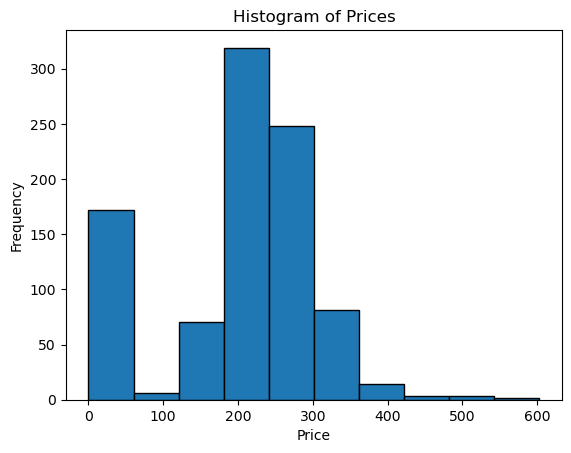

In [5]:
plt.hist(data['Cholesterol'], bins=10, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [8]:
#Applying Z score to remove outliers
data["Z_score"] = (data['Cholesterol'] - data['Cholesterol'].mean())/data['Cholesterol'].std()

In [9]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0.596068
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.340090


In [15]:
#Removing outliers with Z-Score as 3

new_data = data[(-3<data['Z_score']) & (data['Z_score']<3)]
new_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0.596068
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.340090


In [23]:
#converting text columns to numeric columns
dummies=pd.get_dummies(new_data['ChestPainType'])
dummies = dummies.applymap(lambda x: 1 if x==True else 0)
dummies

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [25]:
new_data = pd.concat([new_data,dummies],axis=1)

In [26]:
new_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score,ASY,ATA,NAP,TA
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621,0,1,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768,0,1,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,1,0,0,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0.596068,0,0,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020,1,0,0,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830,1,0,0,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.340090,0,1,0,0


In [27]:
#dropping the ChestPainType table
new_data.drop(['ChestPainType'],axis=1,inplace=True)

In [28]:
new_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score,ASY,ATA,NAP,TA
0,40,M,140,289,0,Normal,172,N,0.0,Up,0,0.824621,0,1,0,0
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0,0,1,0
2,37,M,130,283,0,ST,98,N,0.0,Up,0,0.769768,0,1,0,0
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,1,0,0,0
4,54,M,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,Normal,132,N,1.2,Flat,1,0.596068,0,0,0,1
914,68,M,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020,1,0,0,0
915,57,M,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830,1,0,0,0
916,57,F,130,236,0,LVH,174,N,0.0,Flat,1,0.340090,0,1,0,0


In [30]:
df_male = new_data[new_data['Sex']=='M']
df_female = new_data[new_data['Sex']=='F']

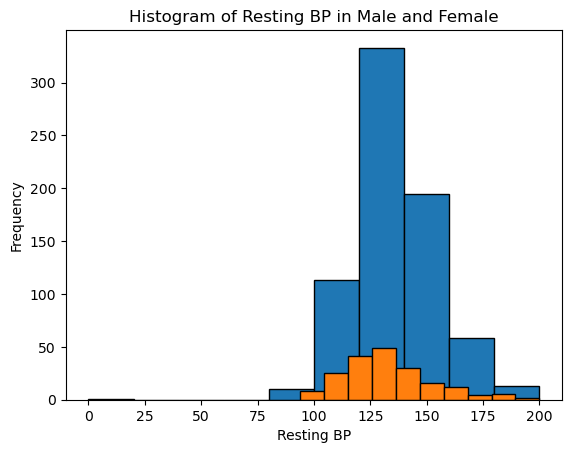

In [35]:
plt.hist(df_male['RestingBP'], bins=10, edgecolor='black')
plt.hist(df_female['RestingBP'], bins=10, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Resting BP in Male and Female')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [36]:
new_data["Z_score_BP"] = (new_data['RestingBP'] - new_data['RestingBP'].mean())/new_data['RestingBP'].std()

In [38]:
new_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score,ASY,ATA,NAP,TA,Z_score_BP
0,40,M,140,289,0,Normal,172,N,0.0,Up,0,0.824621,0,1,0,0,0.408334
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0,0,1,0,1.487708
2,37,M,130,283,0,ST,98,N,0.0,Up,0,0.769768,0,1,0,0,-0.131353
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,1,0,0,0,0.300396
4,54,M,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,0,0,1,0,0.948021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,Normal,132,N,1.2,Flat,1,0.596068,0,0,0,1,-1.210727
914,68,M,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020,1,0,0,0,0.624208
915,57,M,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830,1,0,0,0,-0.131353
916,57,F,130,236,0,LVH,174,N,0.0,Flat,1,0.340090,0,1,0,0,-0.131353


In [44]:
new_data = new_data[(-3<new_data['Z_score_BP']) & (new_data['Z_score_BP']<3)]
new_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score,ASY,ATA,NAP,TA,Z_score_BP
0,40,M,140,289,0,Normal,172,N,0.0,Up,0,0.824621,0,1,0,0,0.408334
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0,0,1,0,1.487708
2,37,M,130,283,0,ST,98,N,0.0,Up,0,0.769768,0,1,0,0,-0.131353
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,1,0,0,0,0.300396
4,54,M,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,0,0,1,0,0.948021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,Normal,132,N,1.2,Flat,1,0.596068,0,0,0,1,-1.210727
914,68,M,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020,1,0,0,0,0.624208
915,57,M,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830,1,0,0,0,-0.131353
916,57,F,130,236,0,LVH,174,N,0.0,Flat,1,0.340090,0,1,0,0,-0.131353


In [47]:
new_data["Sex"] = new_data["Sex"].apply(lambda x : 1 if x=='F' else 0)

C:\Users\phani\AppData\Local\Temp\ipykernel_34272\1577431606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Sex"] = new_data["Sex"].apply(lambda x : 1 if x=='F' else 0)


In [48]:
new_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_score,ASY,ATA,NAP,TA,Z_score_BP
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,0.824621,0,1,0,0,0.408334
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0,0,1,0,1.487708
2,37,0,130,283,0,ST,98,N,0.0,Up,0,0.769768,0,1,0,0,-0.131353
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,1,0,0,0,0.300396
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,0,0,1,0,0.948021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,Normal,132,N,1.2,Flat,1,0.596068,0,0,0,1,-1.210727
914,68,0,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020,1,0,0,0,0.624208
915,57,0,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830,1,0,0,0,-0.131353
916,57,1,130,236,0,LVH,174,N,0.0,Flat,1,0.340090,0,1,0,0,-0.131353


In [50]:
new_data.drop(['Z_score','Z_score_BP'],axis=1,inplace=True)

C:\Users\phani\AppData\Local\Temp\ipykernel_34272\3076498527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(['Z_score','Z_score_BP'],axis=1,inplace=True)


In [51]:
new_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,0,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,Normal,132,N,1.2,Flat,1,0,0,0,1
914,68,0,144,193,1,Normal,141,N,3.4,Flat,1,1,0,0,0
915,57,0,130,131,0,Normal,115,Y,1.2,Flat,1,1,0,0,0
916,57,1,130,236,0,LVH,174,N,0.0,Flat,1,0,1,0,0


In [52]:
new_data["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [55]:
#Applying label encoder for ST_Slope , ExcerciseAngina, RestingECG
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Gender' column
new_data['ST_Slope'] = label_encoder.fit_transform(new_data['ST_Slope'])
new_data['ExerciseAngina'] = label_encoder.fit_transform(new_data['ExerciseAngina'])
new_data['RestingECG'] = label_encoder.fit_transform(new_data['RestingECG'])



C:\Users\phani\AppData\Local\Temp\ipykernel_34272\1820308067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['ST_Slope'] = label_encoder.fit_transform(new_data['ST_Slope'])
C:\Users\phani\AppData\Local\Temp\ipykernel_34272\1820308067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['ExerciseAngina'] = label_encoder.fit_transform(new_data['ExerciseAngina'])
C:\Users\phani\AppData\Local\Temp\ipykernel_34272\1820308067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

## Final Data after Feature Engineering 

In [57]:
new_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,0,140,289,0,1,172,0,0.0,2,0,0,1,0,0
1,49,1,160,180,0,1,156,0,1.0,1,1,0,0,1,0
2,37,0,130,283,0,2,98,0,0.0,2,0,0,1,0,0
3,48,1,138,214,0,1,108,1,1.5,1,1,1,0,0,0
4,54,0,150,195,0,1,122,0,0.0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,1,132,0,1.2,1,1,0,0,0,1
914,68,0,144,193,1,1,141,0,3.4,1,1,1,0,0,0
915,57,0,130,131,0,1,115,1,1.2,1,1,1,0,0,0
916,57,1,130,236,0,0,174,0,0.0,1,1,0,1,0,0


In [62]:
X = new_data.drop(["HeartDisease"],axis=1)
y = new_data.HeartDisease

## Scaling the Data using Standard Scaler

In [63]:
#scaling the data

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scaled_data = scale.fit_transform(X)
scaled_data

array([[-1.43312892, -0.51477473,  0.46044186, ...,  2.07463095,
        -0.53186975, -0.23114119],
       [-0.47782667,  1.94259728,  1.62454156, ..., -0.48201344,
         1.88015957, -0.23114119],
       [-1.751563  , -0.51477473, -0.12160799, ...,  2.07463095,
        -0.53186975, -0.23114119],
       ...,
       [ 0.37133089, -0.51477473, -0.12160799, ..., -0.48201344,
        -0.53186975, -0.23114119],
       [ 0.37133089,  1.94259728, -0.12160799, ...,  2.07463095,
        -0.53186975, -0.23114119],
       [-1.64541831, -0.51477473,  0.34403189, ..., -0.48201344,
         1.88015957, -0.23114119]])

## Splitting Dataset into Train and Test

In [64]:
#splitting the dataset in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2)

In [66]:
[len(X_train),len(X_test)]

[725, 182]

## SVM 

In [67]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train,y_train)


SVC(kernel='linear')

In [88]:
print("SVM Accuracy without Bagging",model.score(X_test,y_test))

SVM Accuracy without Bagging 0.8461538461538461


In [69]:
y_pred = model.predict(X_test)

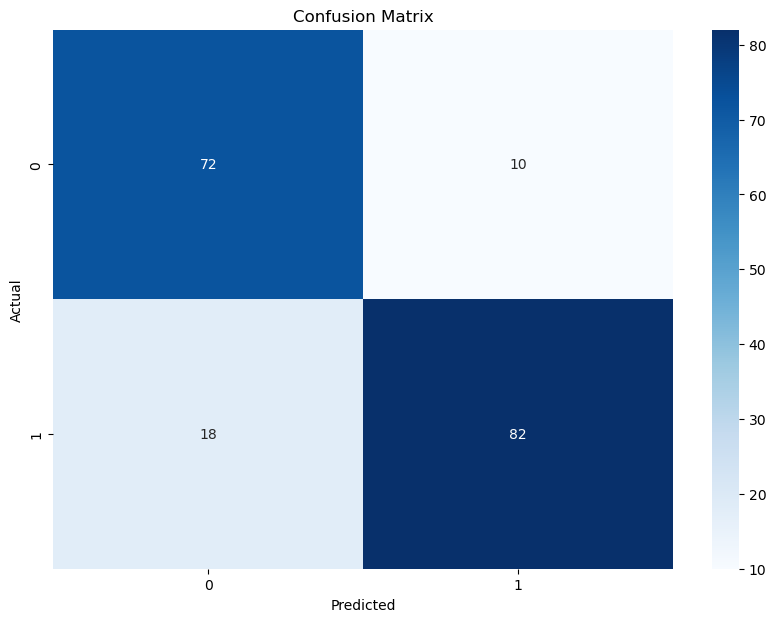

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [89]:
#Applying bagging technique

from sklearn.ensemble import BaggingClassifier

bag_svm_model = BaggingClassifier(

        base_estimator=SVC(kernel = 'linear'),
        n_estimators=100,
        max_samples=0.8,
        oob_score=True,
        random_state=32
)

bag_svm_model.fit(X_train,y_train)
print("SVM Accuracy with Bagging",bag_svm_model.oob_score_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM Accuracy with Bagging 0.8579310344827586


In [92]:
#using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(),X,y,cv=5)
print("SVM Accuracy using Cross Validation",scores.mean())

SVM Accuracy using Cross Validation 0.6890413453949364


## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train,y_train)
score=tree_model.score(X_test,y_test)

print("Decision Tree",score)

Decision Tree 0.7857142857142857


In [96]:
#Applying bagging technique

from sklearn.ensemble import BaggingClassifier

bag_dt_model = BaggingClassifier(

        base_estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,
        oob_score=True,
        random_state=32
)

bag_dt_model.fit(X_train,y_train)
print("Decision Tee Accuracy with Bagging",bag_dt_model.oob_score_)
bag_dt_model.score(X_test,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tee Accuracy with Bagging 0.8648275862068966


0.8296703296703297

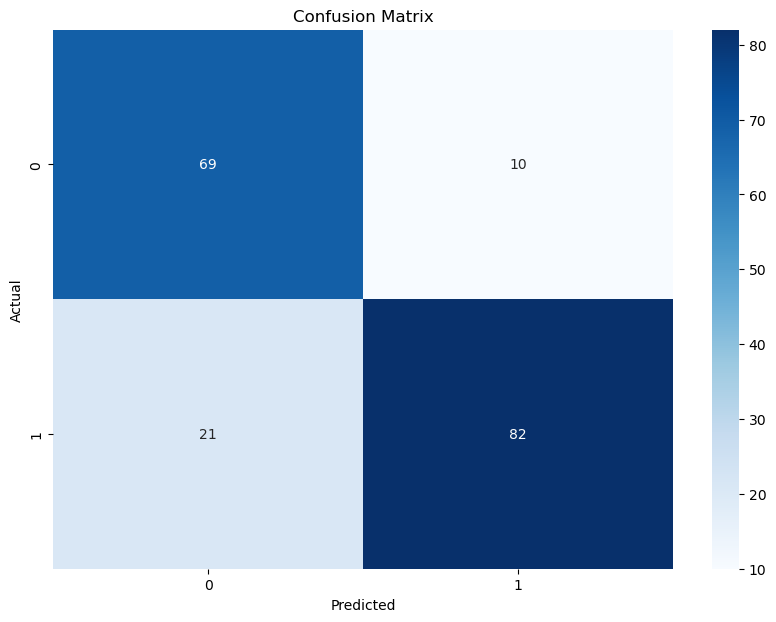

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_bag = bag_dt_model.predict(X_test)
cm = confusion_matrix(y_pred_bag,y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
print("Decision Tree Accuracy using Cross Validation",scores.mean())

Decision Tree Accuracy using Cross Validation 0.7552121911237932


In [94]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Random Forest Classifier Accuracy",scores.mean())

Random Forest Classifier Accuracy 0.8246433124886163


<b>Hence Decision Tree with bagging technique gives the highest accuracy of 86.5%</b>